In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [10]:
data = pd.read_csv("data_7/churnclean.csv")
data = data.drop(columns=['Unnamed: 0'])
numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

data.head(1)

,state,acclength,areacode,interplan,vmailplan,vmailmess,daycalls,daycharge,evecalls,evecharge,nightcalls,nightcharge,intlmins,intlcalls,intlcharge,custservcalls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,10.0,3,2.7,1,no


In [11]:
bool_map = {'yes': 1, 'no': 0}

for col in ['interplan', 'vmailplan', 'churn']:
    data[col] = data[col].map(bool_map)

le = LabelEncoder()
data['state'] = le.fit_transform(data['state'])
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [12]:
rf = RandomForestClassifier(
    n_estimators=50,
    class_weight='balanced',
    random_state=42
)

In [13]:
cv_results = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall')
cv_score = np.mean(cv_results)
cv_stdev = np.std(cv_results)

In [16]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

n_est = list(range(20, 101, 20))
rocauc_list = []
recall_list = []

for n in n_est:
    model = RandomForestClassifier(
        n_estimators=n,
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)
    
    probs = model.predict_proba(X_test)[:,1]
    rocauc_list.append(roc_auc_score(y_test, probs))

    recall = cross_val_score(model, X_train, y_train,
                             cv=5,
                             scoring='recall').mean()
    recall_list.append(recall)


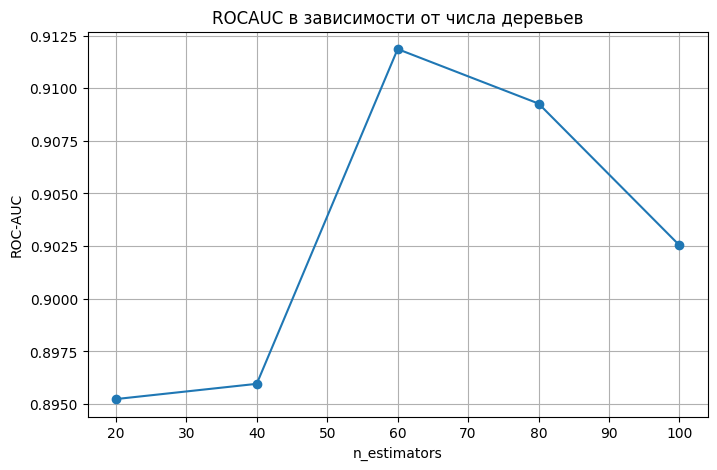

cv_score: 0.32105263157894737
cv_stdev: 0.05619514869490164
accuracy: 0.9352014010507881
n_est: [20, 40, 60, 80, 100]
rocauc_list: [0.8952323717948718, 0.8959566074950691, 0.9118589743589742, 0.9092702169625246, 0.9025363658777121]
optimal_n_est: 40


In [17]:
optimal_n_est = n_est[np.argmax(recall_list)]

plt.figure(figsize=(8,5))
plt.plot(n_est, rocauc_list, marker='o')
plt.xlabel("n_estimators")
plt.ylabel("ROC-AUC")
plt.title("ROCAUC в зависимости от числа деревьев")
plt.grid()
plt.show()

print(f"cv_score: {cv_score}")
print(f"cv_stdev: {cv_stdev}")
print(f"accuracy: {accuracy}")
print(f"n_est: {n_est}")
print(f"rocauc_list: {rocauc_list}")
print(f"optimal_n_est: {optimal_n_est}")

In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("data_7/churnclean.csv")
data = data.drop(columns=['Unnamed: 0'])
numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

bool_map = {'yes': 1, 'no': 0}

for col in ['interplan', 'vmailplan', 'churn']:
    data[col] = data[col].map(bool_map)

le = LabelEncoder()
data['state'] = le.fit_transform(data['state'])
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=50,
    class_weight='balanced',
    random_state=42
)

cv_results = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall')
cv_score = np.mean(cv_results)
cv_stdev = np.std(cv_results)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

n_est = list(range(20, 101, 20))
rocauc_list = []
recall_list = []

for n in n_est:
    model = RandomForestClassifier(
        n_estimators=n,
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)
    
    probs = model.predict_proba(X_test)[:,1]
    rocauc_list.append(roc_auc_score(y_test, probs))

    recall = cross_val_score(model, X_train, y_train,
                             cv=5,
                             scoring='recall').mean()
    recall_list.append(recall)

optimal_n_est = n_est[np.argmax(recall_list)]

print(f"cv_score: {cv_score}")
print(f"cv_stdev: {cv_stdev}")
print(f"accuracy: {accuracy}")
print(f"n_est: {n_est}")
print(f"rocauc_list: {rocauc_list}")
print(f"optimal_n_est: {optimal_n_est}")

cv_score: 0.32105263157894737
cv_stdev: 0.05619514869490164
accuracy: 0.9352014010507881
n_est: [20, 40, 60, 80, 100]
rocauc_list: [0.8952323717948718, 0.8959566074950691, 0.9118589743589742, 0.9092702169625246, 0.9025363658777121]
optimal_n_est: 40
